In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
# Use the iris database to answer the following quesitons:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

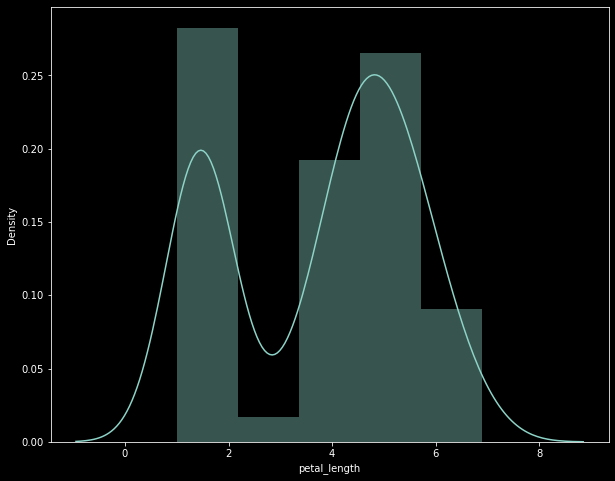

In [72]:
# 1. What does the distribution of petal lengths look like?
plt.figure(figsize = (10,8))
sns.distplot(iris.petal_length)

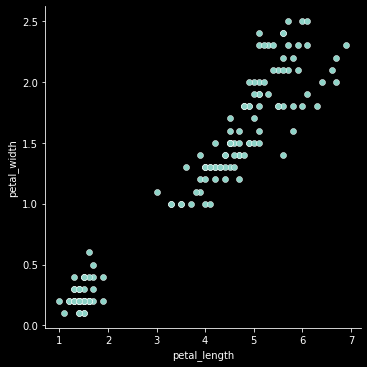

In [17]:
# 2. Is there a correlation between petal length and petal width?
sns.relplot(x='petal_length', y='petal_width', data=iris)
# positive correlation between petal length and width

In [25]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
# probably not, low correlation between sepal width and length
iris.groupby('species')[['sepal_width', 'sepal_length']].mean()

,sepal_width,sepal_length
species,,
setosa,3.428,5.006
versicolor,2.770,5.936
virginica,2.974,6.588


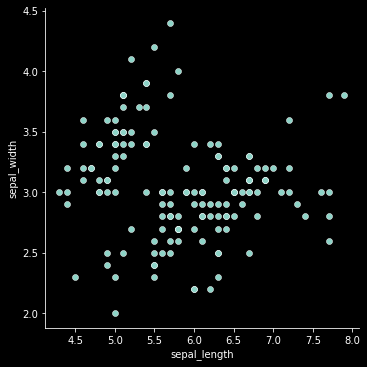

In [26]:
sns.relplot(x='sepal_length', y='sepal_width', data=iris)

<AxesSubplot:ylabel='species'>

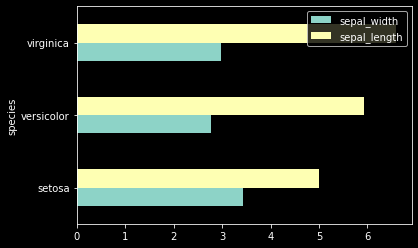

In [23]:
iris.groupby('species')[['sepal_width', 'sepal_length']].mean().plot.barh()

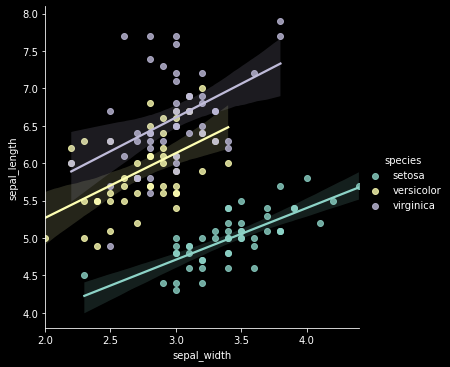

In [294]:
sns.lmplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

<AxesSubplot:ylabel='species'>

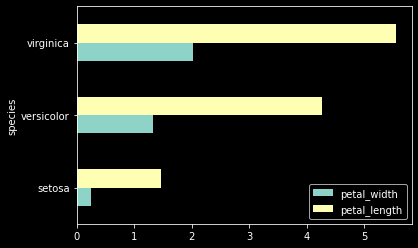

In [27]:
# 4. Which features would be best used to predict species?
# petal length and width better predicts species
iris.groupby('species')[['petal_width', 'petal_length']].mean().plot.barh()

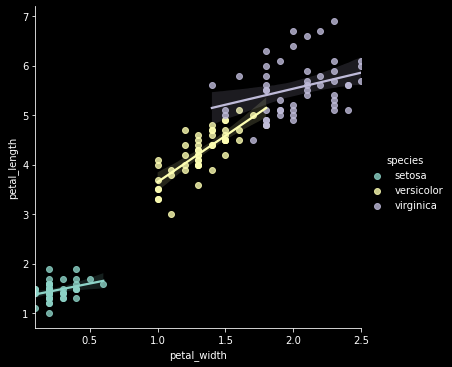

In [295]:
sns.lmplot(data=iris, x='petal_width', y='petal_length', hue='species')

In [49]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [42]:
# Use pandas to group the data by the dataset column,
# and calculate summary statistics for each dataset. What do you notice?
#both x and y have similar values and stats
anscombe.x.describe()

count    44.000000
mean      9.000000
std       3.198837
min       4.000000
25%       7.000000
50%       8.000000
75%      11.000000
max      19.000000
Name: x, dtype: float64

In [43]:
anscombe.y.describe()

count    44.000000
mean      7.500682
std       1.958925
min       3.100000
25%       6.117500
50%       7.520000
75%       8.747500
max      12.740000
Name: y, dtype: float64

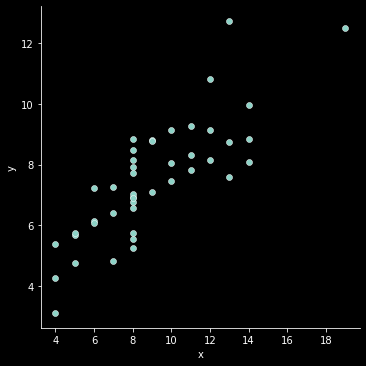

In [78]:
# - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(data = anscombe, x='x',y='y')

In [55]:
#2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [79]:
insect_sprays = data('InsectSprays')
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

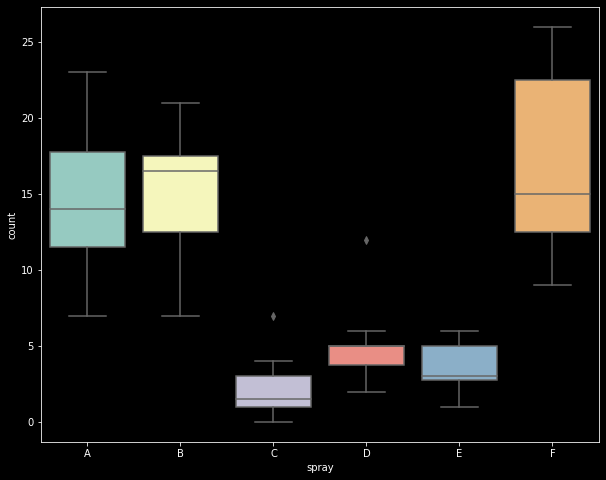

In [71]:
plt.figure(figsize = (10,8))
sns.boxplot(data=insect_sprays,x='spray',y='count')



In [80]:
#3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
swiss = data('swiss')
data('swiss',show_doc=True)


swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [89]:
# - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic.
# (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic >= 50.0
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<Figure size 720x576 with 0 Axes>

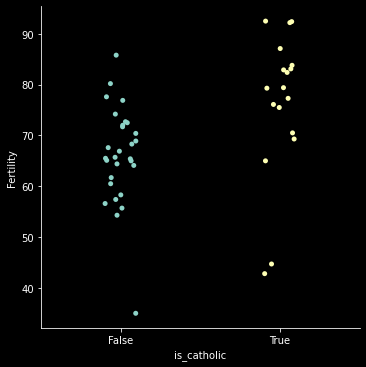

In [103]:
# - Does whether or not a province is Catholic influence fertility?
#generally > 50% catholic means higher fertility
sns.catplot(data = swiss, x='is_catholic',y='Fertility')

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

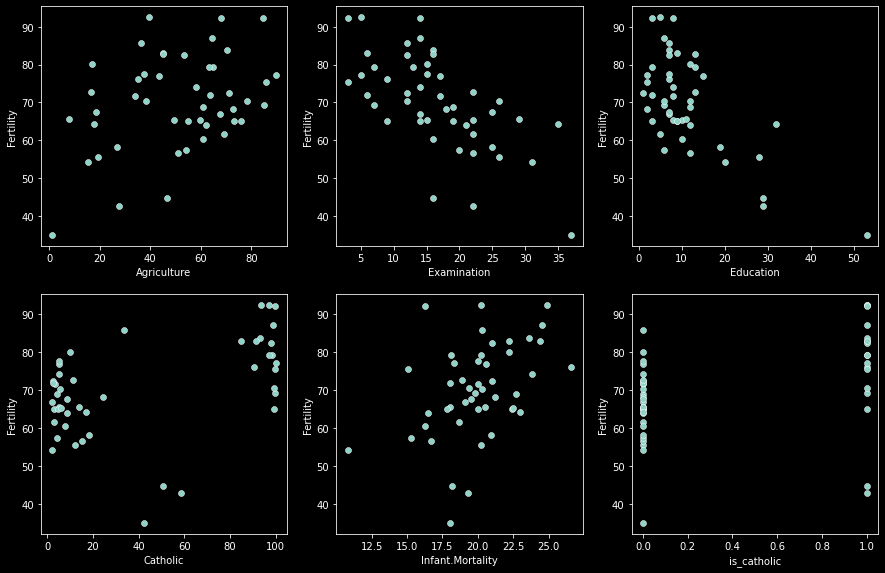

In [122]:
# - What measure correlates most strongly with fertility?
#education negative correlation
plt.figure(figsize=(15, 15))

plt.subplot(331)
sns.scatterplot(x='Agriculture', y='Fertility', data=swiss)

plt.subplot(332)
sns.scatterplot(x='Examination', y='Fertility', data=swiss)

plt.subplot(333)
sns.scatterplot(x='Education', y='Fertility', data=swiss)

plt.subplot(334)
sns.scatterplot(x='Catholic', y='Fertility', data=swiss)

plt.subplot(335)
sns.scatterplot(x='Infant.Mortality', y='Fertility', data=swiss)

plt.subplot(336)
sns.scatterplot(x='is_catholic', y='Fertility', data=swiss)

In [127]:
# 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue
# produced by each.
from env import host, user, password

db = 'chipotle'


def get_db_url(user, host, passw, db):
    url = f'mysql+pymysql://{user}:{passw}@{host}/{db}'
    return url


chipotle_url = get_db_url(user, host, password, db)

chipotle_df = pd.read_sql('select * from orders', chipotle_url)
chipotle_df.to_csv('chipotle.csv')
chipotle_df = pd.read_csv('chipotle.csv')
chipotle_df.item_price = chipotle_df.item_price.str.replace('$','').str.replace(',','').astype('float')
chipotle_df.head()

,Unnamed: 0,id,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,2,1,1,Izze,[Clementine],3.39
2,2,3,1,1,Nantucket Nectar,[Apple],3.39
3,3,4,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [369]:
top4 = chipotle_df.groupby('item_name')[['quantity','item_price']].sum().sort_values(by='quantity',ascending=False).head(4)
top4 

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43


In [370]:
top4 = pd.DataFrame(top4)
top4.columns = ['quantity','revenue']
top4

,quantity,revenue
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43


<AxesSubplot:xlabel='quantity', ylabel='revenue'>

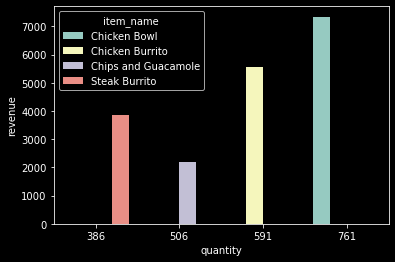

In [371]:

sns.barplot(data = top4, x='quantity',y='revenue',hue=top4.index)

In [366]:
#created new dataframe with item_name as new column instead of index
top4 = pd.DataFrame({'item_name':top4.index.tolist(),'revenue':top4.revenue.tolist()})
top4 = top4.sort_values(by='revenue')
top4

,item_name,revenue
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43
1,Chicken Burrito,5575.82
0,Chicken Bowl,7342.73


<AxesSubplot:xlabel='item_name', ylabel='revenue'>

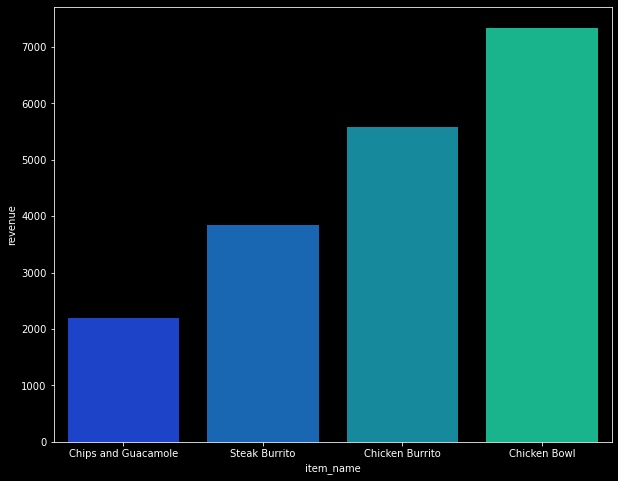

In [367]:
plt.figure(figsize = (10,8))
sns.barplot(data=top4,x='item_name',y='revenue',palette='winter')

In [170]:
#5. Load the sleepstudy data and read it's documentation. 
data('sleepstudy',show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [266]:
sleepstudy = data('sleepstudy')
sleepstudy.head(20)

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308


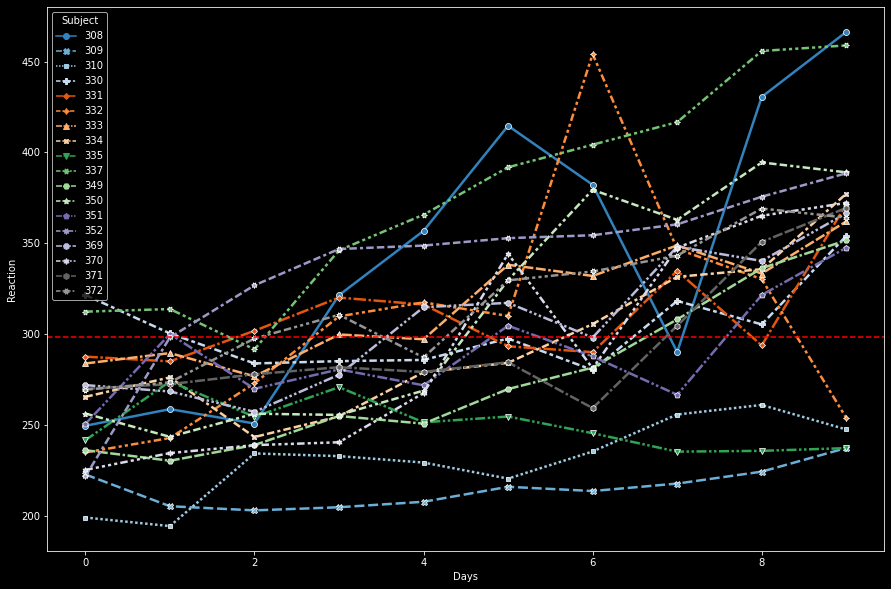

In [349]:
# Use seaborn to create a line chart of 
# all the individual subject's reaction times and a
# more prominant line showing the average change in reaction time.
plt.figure(figsize = (15,10))

sns.lineplot(data=sleepstudy,x='Days',y='Reaction',style='Subject',hue='Subject',palette='tab20c',markers=True,legend='full',linewidth = 2.5 )
plt.axhline(sleepstudy.Reaction.mean(), color='r', linestyle='--')

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

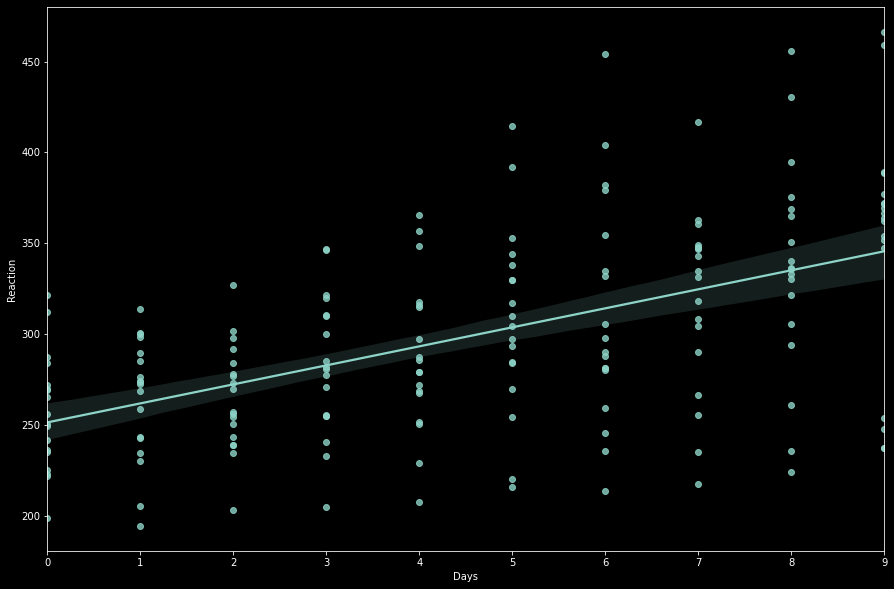

In [377]:
#testing different plots
plt.figure(figsize = (15,10))
sns.regplot(data=sleepstudy,x='Days',y='Reaction')